# **Car Accident Severity Prediction**
___

## Table of contents
* [1. Introduction: Business Problem Understanding](#introduction)
 * [1.1. Problem Background](#background)
 * [1.2. Approaching the Problem](#approaching)
 * [1.3. Problem Definition and Stakeholders](#stakes)
* [2. Data](#data)
 * [2.1. Source of the Data](#source)
 * [2.2. Description of the Data](#description)
 * [2.3. Data Preparation](#preparation)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
 * [4.1. Exploratory Data Analysis](#eda)
 * [4.2. Spatial Feature Extraction](#spatial)
 * [4.3. Data Preprocessing](preprocessing)
 * [4.4. Classification Model Building](#building)
      * [K Nearest Neighbor (KNN)](#knn)
      * [Decision Tree](#tree)
      * [Support Vector Machine](#svm)
      * [Logistic Regression](#logreg)
* [5. Results and Discussion: Model Evaluation & Selection](#results)
* [6. Conclusion](#conclusion)
* [Appendix](#appendix)

---

# 1. Introduction & Business Problem Understanding <a name="introduction"></a>
## 1.1. Problem Background <a name="background"></a>
Today, the number of people killed in road crashes around the world continues to increase. According to the World Health Organisation’s “Global Status Report on Road Safety”, it reached 1.35 million in 2016 alone. This means that, worldwide, more people die as a result of road traffic injuries than from HIV/AIDS, tuberculosis or diarrhoeal diseases. And road crashes are now the most common cause of death for children and young people between 5 and 29 worldwide.

Even the significant improvement in the situation in the field of road accidents (especially severe ones in terms of human fatality, traffic delay, property damage) in the "developed" countries over the last decades has not led to the complete elimination of the phenomenon as the mindset of a required "Vision Zero" still remain at stake (in Europe alone, car accidents kill weekly as many people as fit into a jumbo jet, and as we do not accept deaths in the air, we should no longer accept them on the road).


## 1.2. Approaching the Problem <a name="approaching"></a>
The City of Seattle Government has long aligned its road safety policies with the framework and the targets UN and WHO have adopted approaching the issue in terms of "Safe System". The core elements of this approach are ensuring safe vehicles, safe infrastructure, safe road use (speed, sober driving, wearing safety belts and helmets) and better post-crash care.

But the end of the UN "Decade of Action for Road Safety" (2010-2020) happens to coincide with the moment that to the above systematic approach could be added tools that the modern capacities of data science offer today. Wouldn't it be great if we could exploit their well-established algorithms and available data for an extra, case tailored this time, preventive approach that could warn both drivers and traffic services, about the possibility of a car accident given some objective and subjective conditions and factors? Or wouldn’t it be useful to predict how severe this accident would be so that a driver would drive more carefully or change travel route, and traffic services prepare their response? Well, this potential promising contribution of machine learning to the global debate on road safety is the object of this project in which the long-established elements of the Safe System approach will be used as predictors for a machine learning model able to predict accident "severity".

## 1.3. Problem Definition and Stakeholders <a name="stakes"></a>
The Seattle Department of Transportation (SDOT: the municipal government agency in Seattle, Washington that is responsible for the maintenance of the city's transportation systems, including roads, bridges, and public transportation) has asked us, on behalf of its Response Team as well as the Seattle Police Department (SPD), to build a ML model that will help them to a better perception-prediction of the risk of a severe road accident if we know and can evaluate quantitatively or qualitatively the conditions and circumstances of the municipal road network.

It should be noted that this is not a study which attempts to link, with an ML approach, the grid of all the causes and effects of a car accident. Rather, it is a study that attempts to connect specifically:

- exactly one effect: the severity (human injury) or not (property damage only) of an accident with
- a range of causes / factors contributing to the accident in relation with which the SDOT, its Response Team and the SPD can intervene (by improving or warning) and be prepared (to dispense in the most appropriate and effective way of its response resources)

---

# 2. Data <a name="data"></a>
## 2.1. Source of the Data <a name="source"></a>

The [dataset](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) we will rely has been updated weekly by the SDOT Traffic Management Division, and its data come from the Seattle Police Department Traffic Records and record all types of collisions from 2004 to May 2020.

## 2.2. Description of the data <a name="description"></a>
Τhe dataset is rich and contains many observations (rows) and various attributes (columns). Before wrangling, our observations (rows) are 194,673, most of which are good to train and test the machine learning model. Of course, this does not mean that we do not need to proceed to data cleaning and tidying, as well as in data balancing (otherwise we would create a biased ML model) since as expected severe accidents are significantly less than non-severe ones (more specifically severe ones are slightly less than 1/3 of the total).


|Attribute|Description|
|---|:---|
|**SEVERITYCODE**|**A code that corresponds to the severity of the collision**:<ul><li>1-property damage</li><li>2-human injury</li></ul>|
|**X**|**Accident Location's Longitude**|
|**Y**|**Accident Location's Latitude**|
|<span style="color:gray">*OBJECTID <br/>INCKEY <br/>COLDETKEY <br/>REPORTNO <br/>STATUS <br/>ADRESSTYPE <br/>INTKEY*</span>|<span style="color:gray">*no description*</span>|
|<span style="color:gray">LOCATION</span>|Description of the general location of the collision|
|<span style="color:gray">*EXCEPTRSNCODE*</span>|<span style="color:gray">*no description*</span>|
|<span style="color:gray">*SEVERITYCODE*</span>|<span style="color:gray">*Repeat of 1st column (label/target)*</span>|
|<span style="color:gray">*EXCEPTRSNDESC*</span>|<span style="color:gray">*no description*</span>|
|SEVERITYDESC|A detailed description of the severity of the collision|
|COLLISIONTYPE|Collision type|
|PERSONCOUNT|The total number of people involved in the collision|
|PEDCOUNT|The number of pedestrians involved in the collision. This is entered by the state|
|PEDCYLCOUNT|The number of bicycles involved in the collision. This is entered by the state|
|VEHCOUNT|The number of vehicles involved in the collision. This is entered by the state|
|**INCDATE**|**The date of the incident**|
|**INCDTTM**|**The date and time of the incident**|
|**JUNCTIONTYPE**|**Category of junction at which collision took place**|
|<span style="color:gray">*SDOT_COLCODE*</span>|<span style="color:gray">*A code given to the collision by SDOT*</span>|
|<span style="color:gray">*SDOT_COLDESC*</span>|<span style="color:gray">*A description of the collision corresponding to the collision code*</span>|
|**INATTENTIONIND**|**Whether or not collision was due to inattention (Y/N)**|
|**UNDERINFL**|**Whether or not a driver involved was under the influence of drugs or alcohol**|
|**WEATHER**|**A description of the weather conditions during the time of the collision**|
|**ROADCOND**|**The condition of the road during the collision**|
|**LIGHTCOND**|**The light conditions during the collision**|
|**PEDROWNOTGRNT**|**Whether or not the pedestrian right of way was not granted (Y/N)**|
|*SDOTCOLNUM*|*A number given to the collision by SDOT*|
|**SPEEDING**|**Whether or not speeding was a factor in the collision (Y/N)**|
|<span style="color:gray">*ST_COLCODE*</span>|<span style="color:gray">*A code provided by the state that describes the collision*</span>|
|<span style="color:gray">*ST_COLDESC*</span>|<span style="color:gray">*A description that corresponds to the state’s coding designation*</span>|
|<span style="color:gray">*SEGLANEKEY*</span>|<span style="color:gray">*A key for the lane segment in which the collision occurred*</span>|
|<span style="color:gray">*CROSSWALKKEY*</span>|<span style="color:gray">*A key for the crosswalk at which the collision occurred*</span>|
|HITPARKEDCAR|Whether or not the collision involved hitting a parked car (Y/N)|
|||
||[Metadata source](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)|

Our dataset's first column is the labeled data which describes the fatality of an accident/collision taking only two values that correspond to "severe" and "not severe" (binary classification problem). Of the remaining 36 columns of the dataset (with either numerical or categorical types of data), not all of them are useful for our classifier building:

- Several (in italics in the above table) are keys, state designation codes or long, rather "useless" long textual descriptions
- A few others (regular text) could be very useful in another type of problem and model building, where we would be interested in a more descriptive analytical approach that would include several aspects of a car accident (approached as a given event rather as a (probable) event)
- Among the remaining ones (in boldface: **location coordinates**, **date**, **time**, **junction type**, **inattention ivolved**, **driver under drugs/alcohol influence**, **weather, road and light conditions**, **speeding involved**, **"pedestrian right of way" not granted**, ) could be the features that, along with some feature engineering, we will use to train the model.

In [1]:
#disable all warnings in order to avoid confusion 
import warnings
warnings.filterwarnings(action='ignore')

#download the dataset
import requests
csv_url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('Data-Collisions.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [1]:
#load csv into a DataFrame
import pandas as pd 
df = pd.read_csv("Data-Collisions.csv") 

#maintain only the features that may be of interest and use for our model building
df = df[['SEVERITYCODE', 'X', 'Y', 'INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL',
          'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING']]
print('The df\'s dimenions (obs, features) are:')
print(df.shape)

The df's dimenions (obs, features) are:
(194673, 12)


## 2.3. Data Preparation <a name="preparation"></a>

Let's first see if any of the selected variables have a significantly high number of missing values (converted into *NaN values* during csv's import to DataFrame format):

In [2]:
df.isnull().sum()/len(df)

SEVERITYCODE      0.000000
X                 0.027400
Y                 0.027400
INCDTTM           0.000000
JUNCTIONTYPE      0.032511
INATTENTIONIND    0.846897
UNDERINFL         0.025088
WEATHER           0.026100
ROADCOND          0.025746
LIGHTCOND         0.026557
PEDROWNOTGRNT     0.976026
SPEEDING          0.952058
dtype: float64

From the above we can easily conclude that there is no interest in using three more variables:
- INATTENTIONIND: whether or not collision was due to inattention (Y/N),
- PEDROWNOTGRNT: whether or not the pedestrian right of way was not granted (Y/N),
- SPEEDING: whether or not speeding was a factor in the collision (Y/N)

as the percentage of observations without such values is respectively 84.69%, 97.60% ans 95.21%.

In [3]:
df.drop(['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'], axis=1, inplace=True)
print('The df\'s dimenions (obs, features) are now:')
print(df.shape)
df.head()

The df's dimenions (obs, features) are now:
(194673, 9)


SEVERITYCODE           X          Y                 INCDTTM  \
0             2 -122.323148  47.703140    3/27/2013 2:54:00 PM   
1             1 -122.347294  47.647172   12/20/2006 6:55:00 PM   
2             1 -122.334540  47.607871  11/18/2004 10:20:00 AM   
3             1 -122.334803  47.604803    3/29/2013 9:26:00 AM   
4             2 -122.306426  47.545739    1/28/2004 8:04:00 AM   

                              JUNCTIONTYPE UNDERINFL   WEATHER ROADCOND  \
0   At Intersection (intersection related)         N  Overcast      Wet   
1  Mid-Block (not related to intersection)         0   Raining      Wet   
2  Mid-Block (not related to intersection)         0  Overcast      Dry   
3  Mid-Block (not related to intersection)         N     Clear      Dry   
4   At Intersection (intersection related)         0   Raining      Wet   

                 LIGHTCOND  
0                 Daylight  
1  Dark - Street Lights On  
2                 Daylight  
3                 Daylight  
4                 Daylight

Having dealt with the issue of variables with significantly high number of missing values, we should also deal with the missing values (NaN and 'Unknown') of the remaining ones.

1. For the NAN values, we decide to simply drop all the observations with at least one missing value, given their relatively small amount (as we can see the union set of all these observations is 14,587).

In [4]:
df.dropna(axis=0, inplace=True)
print('The df\'s dimenions (obs, features) are now:')
print(df.shape)

The df's dimenions (obs, features) are now:
(180086, 9)


2. For the "Unkwown" values, we proceed with the same approach, deleting them (the union set of all these observations is 14,883):

In [5]:
df.drop((set(df.index[df['JUNCTIONTYPE']=="Unknown"].to_list()+
             df.index[df['WEATHER']=="Unknown"].to_list()+
             df.index[df['ROADCOND']=="Unknown"].to_list()+
             df.index[df['LIGHTCOND']=="Unknown"].to_list())), axis=0, inplace=True)
print('The df\'s dimenions (obs, features) are now:')
print(df.shape)

The df's dimenions (obs, features) are now:
(165203, 9)


Last but not least, let's check the unique values of each variable we retained in order to confirm we have ended up with a clean dataset in what concern both the numerical and categorical variables we will try to use for our model building:

In [6]:
for col in df:
    print(col, ':', df[col].unique())

SEVERITYCODE : [2 1]
X : [-122.3231484 -122.3472943 -122.33454   ... -122.3283544 -122.3042172
 -122.3616722]
Y : [47.70314032 47.64717249 47.60787143 ... 47.55303692 47.6695375
 47.55672231]
INCDTTM : ['3/27/2013 2:54:00 PM' '12/20/2006 6:55:00 PM' '11/18/2004 10:20:00 AM'
 ... '1/19/2019 9:25:00 AM' '1/15/2019 4:48:00 PM' '11/30/2018 3:45:00 PM']
JUNCTIONTYPE : ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'At Intersection (but not related to intersection)'
 'Mid-Block (but intersection related)' 'Ramp Junction']
UNDERINFL : ['N' '0' '1' 'Y']
WEATHER : ['Overcast' 'Raining' 'Clear' 'Snowing' 'Other' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
ROADCOND : ['Wet' 'Dry' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt' 'Standing Water'
 'Oil']
LIGHTCOND : ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Dusk'
 'Dawn' 'Dark - Street Lights Off' 'Other' 'Dark - Unk

It looks like we have to deal with two more issues:
1. the "Other" category of WEATHER, ROADCOND, LIGHTCOND (477 obs) and
2. the four categories ("N", "0", "1", "Y") of UNDERINFL which apparently should be grouped in only two

In [7]:
# with the same approach, delete all the "other" including observations
df.drop(set(df[df.WEATHER=="Other"].index.tolist()+
            df[df.ROADCOND=="Other"].index.tolist()+
            df[df.LIGHTCOND=="Other"].index.tolist()), axis=0, inplace=True)

# replace strings "N","0" and "Y","1" with numerics 0 and 1 respectively
df.UNDERINFL.replace("N", 0, inplace=True)
df.UNDERINFL.replace("0", 0, inplace=True)
df.UNDERINFL.replace("Y", 1, inplace=True)
df.UNDERINFL.replace("1", 1, inplace=True)
df = df.reset_index(drop=True)
df

SEVERITYCODE           X          Y                 INCDTTM  \
0                  2 -122.323148  47.703140    3/27/2013 2:54:00 PM   
1                  1 -122.347294  47.647172   12/20/2006 6:55:00 PM   
2                  1 -122.334540  47.607871  11/18/2004 10:20:00 AM   
3                  1 -122.334803  47.604803    3/29/2013 9:26:00 AM   
4                  2 -122.306426  47.545739    1/28/2004 8:04:00 AM   
...              ...         ...        ...                     ...   
164721             2 -122.290826  47.565408   11/12/2018 8:12:00 AM   
164722             1 -122.344526  47.690924   12/18/2018 9:14:00 AM   
164723             2 -122.306689  47.683047    1/19/2019 9:25:00 AM   
164724             2 -122.355317  47.678734    1/15/2019 4:48:00 PM   
164725             1 -122.289360  47.611017   11/30/2018 3:45:00 PM   

                                   JUNCTIONTYPE  UNDERINFL   WEATHER ROADCOND  \
0        At Intersection (intersection related)          0  Overcast      Wet   
1       Mid-Block (not related to intersection)          0   Raining      Wet   
2       Mid-Block (not related to intersection)          0  Overcast      Dry   
3       Mid-Block (not related to intersection)          0     Clear      Dry   
4        At Intersection (intersection related)          0   Raining      Wet   
...                                         ...        ...       ...      ...   
164721  Mid-Block (not related to intersection)          0     Clear      Dry   
164722  Mid-Block (not related to intersection)          0   Raining      Wet   
164723   At Intersection (intersection related)          0     Clear      Dry   
164724   At Intersection (intersection related)          0     Clear      Dry   
164725  Mid-Block (not related to intersection)          0     Clear      Wet   

                      LIGHTCOND  
0                      Daylight  
1       Dark - Street Lights On  
2                      Daylight  
3                      Daylight  
4                      Daylight  
...                         ...  
164721                 Daylight  
164722                 Daylight  
164723                 Daylight  
164724                     Dusk  
164725                 Daylight  

[164726 rows x 9 columns]

Finally, before proceeding to our Exploratory Data Analysis and Model Building, let's convert **INCDTTM** into **MONTH**, **WEEKDAY**, and **HOUR**:

In [8]:
df['DATE_TIME'] = pd.to_datetime(df['INCDTTM'])
df['WEEKDAY'] = df['DATE_TIME'].dt.weekday
df['MONTH'] = df['DATE_TIME'].dt.month
df['HOUR'] = df['DATE_TIME'].dt.hour
df.drop(['DATE_TIME', 'INCDTTM'], axis=1, inplace=True)
df

SEVERITYCODE           X          Y  \
0                  2 -122.323148  47.703140   
1                  1 -122.347294  47.647172   
2                  1 -122.334540  47.607871   
3                  1 -122.334803  47.604803   
4                  2 -122.306426  47.545739   
...              ...         ...        ...   
164721             2 -122.290826  47.565408   
164722             1 -122.344526  47.690924   
164723             2 -122.306689  47.683047   
164724             2 -122.355317  47.678734   
164725             1 -122.289360  47.611017   

                                   JUNCTIONTYPE  UNDERINFL   WEATHER ROADCOND  \
0        At Intersection (intersection related)          0  Overcast      Wet   
1       Mid-Block (not related to intersection)          0   Raining      Wet   
2       Mid-Block (not related to intersection)          0  Overcast      Dry   
3       Mid-Block (not related to intersection)          0     Clear      Dry   
4        At Intersection (intersection related)          0   Raining      Wet   
...                                         ...        ...       ...      ...   
164721  Mid-Block (not related to intersection)          0     Clear      Dry   
164722  Mid-Block (not related to intersection)          0   Raining      Wet   
164723   At Intersection (intersection related)          0     Clear      Dry   
164724   At Intersection (intersection related)          0     Clear      Dry   
164725  Mid-Block (not related to intersection)          0     Clear      Wet   

                      LIGHTCOND  WEEKDAY  MONTH  HOUR  
0                      Daylight        2      3    14  
1       Dark - Street Lights On        2     12    18  
2                      Daylight        3     11    10  
3                      Daylight        4      3     9  
4                      Daylight        2      1     8  
...                         ...      ...    ...   ...  
164721                 Daylight        0     11     8  
164722                 Daylight        1     12     9  
164723                 Daylight        5      1     9  
164724                     Dusk        1      1    16  
164725                 Daylight        4     11    15  

[164726 rows x 11 columns]

So we can say now that we have completed our data preparation tasks (cleansing and transforming raw data). Hence on, whatever transformation of our data will be imposed by the needs of their explotatory analysis and the per se feature selection/extraction and data preprocessing for the model buiding.

---

# 3. Methodology <a name="methodology"></a>

In this project we will direct our efforts on building a good classifier with which we will try to predict the severity (involving human injury) of a car accident, given some conditions and space and tie coordinates.

In first step we have collected, cleaned and prepared our data getting rid of variables whose interest rest out of the scope of this project.

Second step is our exploratory analysis which will mainly be based on some bivariate and correlation analysis, that will try to investigate the relationship between our variables. Here we will try to understand which of them would be the better features for our model, which should be transformed for that, and which should be considered as abundant. Next we will work on the spatial aspect of our problem. We will try from the simple X-Y accident's coordinates to extract some other spatial feature, useful for our model and practical for the stakeholders (SDOT, SPD). After that, we should of course take care of some preprocessing of our dataset, so as to be in form of beiing digested by the algorithms, we will balance our severely unbalanced dataset, and we will also proceed to train-test split.

After all, we will try to build and optimize our classification model, based on four algorithms:
- K Nearest Neighbor (KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
To do so, we will test different values of their hypeparameters, and for each case we will keep the ones with the best performance so as to finally evaluate them against each other on the hold-out test dataset.

---

# 4. Analysis <a name="analysis"></a>
## 4.1. Exploratory Data Analysis  <a name="eda"></a>

### DESCRIPTIVE STATISTICS
Let's start with a basic overview of our variables' descriptive statistics and types:

In [9]:
pd.DataFrame(df.describe(include="all")).append(pd.DataFrame([df.dtypes],index=['type'],columns=df.columns))

SEVERITYCODE          X          Y  \
count        164726     164726     164726   
unique          NaN        NaN        NaN   
top             NaN        NaN        NaN   
freq            NaN        NaN        NaN   
mean        1.33111    -122.33     47.619   
std        0.470615  0.0297912  0.0566854   
min               1   -122.419    47.4956   
25%               1   -122.348    47.5743   
50%               1    -122.33    47.6148   
75%               2   -122.312    47.6637   
max               2   -122.239    47.7341   
type          int64    float64    float64   

                                   JUNCTIONTYPE  UNDERINFL WEATHER ROADCOND  \
count                                    164726     164726  164726   164726   
unique                                        6        NaN       9        7   
top     Mid-Block (not related to intersection)        NaN   Clear      Dry   
freq                                      72972        NaN  105761   118066   
mean                                        NaN  0.0528332     NaN      NaN   
std                                         NaN   0.223701     NaN      NaN   
min                                         NaN          0     NaN      NaN   
25%                                         NaN          0     NaN      NaN   
50%                                         NaN          0     NaN      NaN   
75%                                         NaN          0     NaN      NaN   
max                                         NaN          1     NaN      NaN   
type                                     object      int64  object   object   

       LIGHTCOND  WEEKDAY    MONTH     HOUR  
count     164726   164726   164726   164726  
unique         7      NaN      NaN      NaN  
top     Daylight      NaN      NaN      NaN  
freq      109379      NaN      NaN      NaN  
mean         NaN  2.93985  6.54467  11.4907  
std          NaN  1.91835  3.40742  6.88798  
min          NaN        0        1        0  
25%          NaN        1        4        7  
50%          NaN        3        7       13  
75%          NaN        5       10       17  
max          NaN        6       12       23  
type      object    int64    int64    int64

### BIVARIATE ANALYSIS

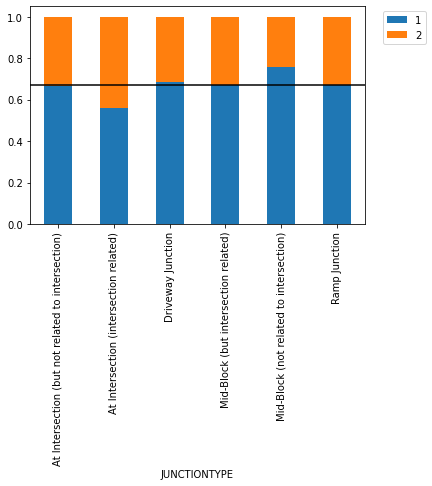

In [12]:
import matplotlib.pyplot as plt
ct=pd.crosstab(df.JUNCTIONTYPE, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

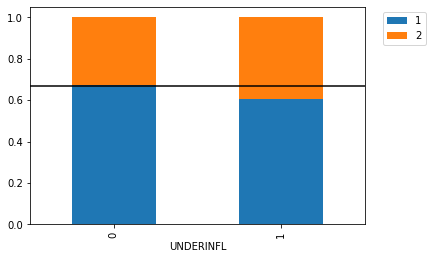

In [11]:
ct=pd.crosstab(df.UNDERINFL, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

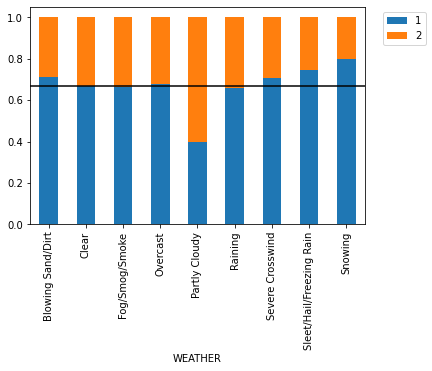

In [13]:
ct=pd.crosstab(df.WEATHER, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

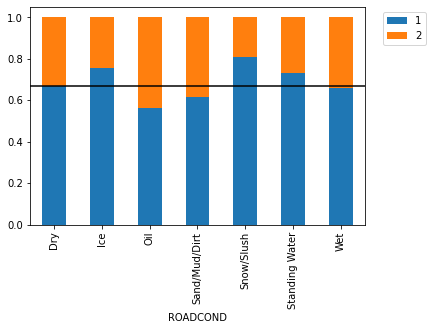

In [14]:
ct=pd.crosstab(df.ROADCOND, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

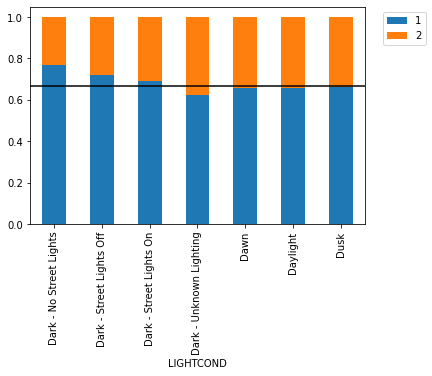

In [15]:
ct=pd.crosstab(df.LIGHTCOND, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

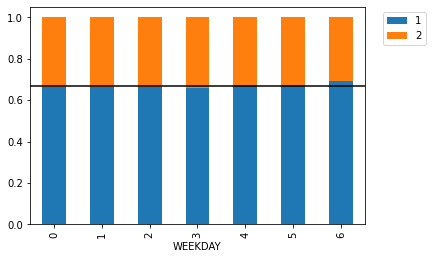

In [16]:
ct=pd.crosstab(df.WEEKDAY, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

Only from the plot it seems the WEEKDAY variable, at least as it is, will not play a major role in our models. So, we proceed already in its transformation from a 7-categories variable to a binary variable, that is ***weekdays(M-T) : 0*** and ***long weekend (F-S) : 1***, and we replot: 

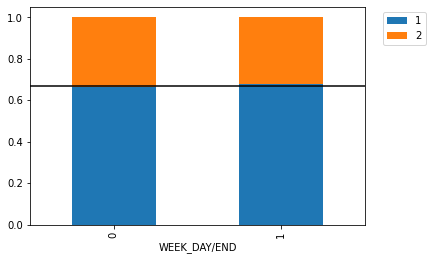

In [17]:
df["WEEK_DAY/END"] = pd.cut(df.WEEKDAY, bins=[0,3,6], labels=[0, 1], include_lowest=True)

ct=pd.crosstab(df["WEEK_DAY/END"], df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

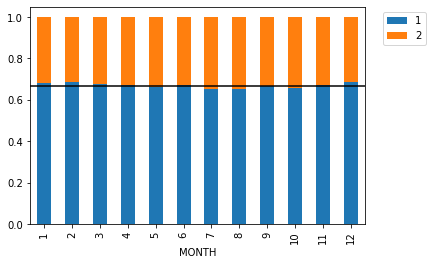

In [18]:
ct=pd.crosstab(df.MONTH, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

As previously, from the plot it seems the MONTH variable, at least as it is, will not play a major role in our models. So, we proceed already in its transformation from a 12-class variable into a 4-class variable, that is ***Winter(1,2,12)***, ***Spring(3-5)***, ***Summer(6-8)*** and ***Autumn (9-11)***, and we replot: 

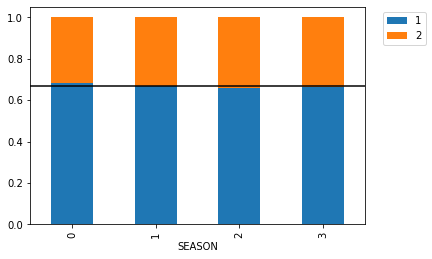

In [19]:
df["SEASON"] = pd.cut(df.MONTH, bins=[0,2,5,8,11,12], labels=[0, 1, 2, 3, 4], include_lowest=True)
df.SEASON[df.SEASON==4]=0

ct=pd.crosstab(df.SEASON, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

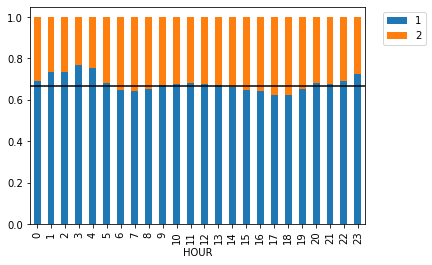

In [20]:
ct=pd.crosstab(df.HOUR, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

As previously, from the plot it seems the MONTH variable, at least as it is, will not play a major role in our models. So, we proceed already in its transformation from a 12-class variable into a 4-class variable, that is ***Winter(1,2,12)***, ***Spring(3-5)***, ***Summer(6-8)*** and ***Autumn (9-11)***, and we replot: 

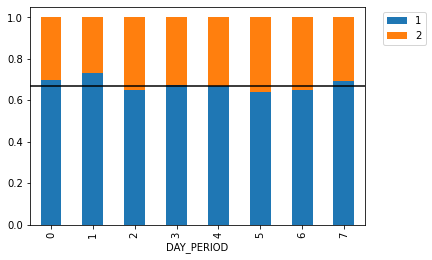

In [21]:
df["DAY_PERIOD"] = pd.cut(df.HOUR, bins=[0, 2, 5, 8, 11, 14, 17, 20, 23],
                          labels=[0, 1, 2, 3, 4, 5, 6, 7], include_lowest=True)
ct=pd.crosstab(df.DAY_PERIOD, df.SEVERITYCODE, normalize="index")

ct.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.axhline(y=sum(df.SEVERITYCODE==1)/len(df.SEVERITYCODE), color='black', linestyle='-')
plt.show()

### CRAMMER'S V CORRELATION
With our extended df, we will proceed to a correlation investigation of our variables between each other, and with the target variable. But since the majority of our data, always excluding X and Y coordinates, is categorical, we will use the Crammer's V Correlation and its heatmap. 

In [22]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_encoded = pd.DataFrame() 

for i in df[df.columns.difference(['X','Y'])].columns :
    df_encoded[i]=label.fit_transform(df[df.columns.difference(['X','Y'])][i])

In [23]:
#Building of the Cramer's V function

from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [24]:
#Building of the matrix

rows= []

for var1 in df_encoded:
  col = []
  for var2 in df_encoded :
    cramers =cramers_V(df_encoded[var1], df_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results, columns = df_encoded.columns, index =df_encoded.columns)

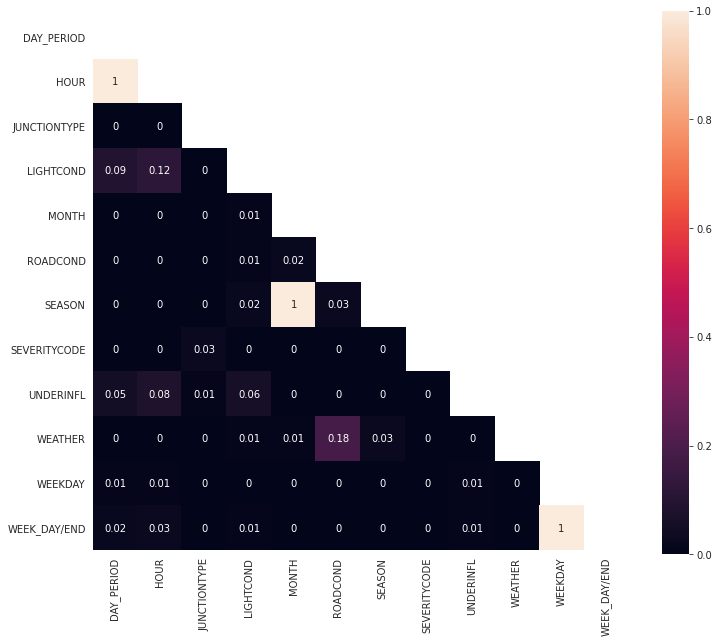

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(data, mask=mask, annot=True, vmin=0., vmax=1, square=True)

plt.show()

From the above, we can safely conclude that we have to choose:

- only one between HOUR and DAY_PERIOD whose correlation is 1, 
- only one as well between MONTH and SEASON  whose correlation is 1, and
- only one between WEEK_DAY/END and WEEKDAY for the same reason.

We decide will go respectiveley for DAY_PERIOD, MONTH and WEEKDAY, instead of HOUR, SEASON, WEEK_DAY/END. In all cases, we based our choise on which variable has less Crammer's V Correlation with the rest of the variables (we would also use the criterion which variable has more Crammer's V Correlation with the target variable (SEVERITYCODE) but in our case all six pairs' values are 0).

* DAY_PERIOD: 0.17/9 **<** HOUR: 0.24/9
* SEASON: 0.08/9 **>** MONTH: 0.04/9
* WEEK_DAY/END: 0.07/9 **>** WEEKDAY: 0.03/9

In [24]:
df.drop(['HOUR', 'SEASON', 'WEEK_DAY/END'], axis=1, inplace=True)

## 4.2. Spatial Feature Extraction  <a name="spatial"></a>

So it is time to deal with the spatial parameter of our problem. There are three ways to integrate the data of columns X and Y in the final table with which we will train our model:

1. Not changing anything, and using these features as they are,
2. With a clustering approach, replacing the accidents' coordinates with the cluster that each one is placed,
3. With a binning and creating a grid map approach, cutting the map in 2-D bins and replacing the accidents' geographic coordinates with its corresponding grid zone.
4. With a bining based on distance from city center approach

1\. The first option, not changing anything and feeding our model with the geographical coordinates of each accient, doesn't seem very efficient or helpful for the practical needs of the SDOT and SPD forces that will be overseeing the roads of the area and alerting for response wherever necessary. It's much more practical for a service to have areas with related characteristics (which have a higher or lower probability of a serious accident and require a specific level of protective and precautionary measures and vigilance) different from their neighboring ones.  rouping in this way, we may lose in precision (since we would act/think with the notion of the "average") but we gain in abstraction as we have to worry about less details. And in fact, no one guarantees that we do not lose in accuracy. Even more, training the algorithm with such in detail differentiated observations will surely lead to over-fitting.

2\. Regarding the clustering approach, it would be interesting in our case to try two diffent a clustering techniques:

- a Density-Based Spatial Clustering of Applications with Noise (DBSCAN), based on location and SEVERITYCODE, and
- a K-means Clustering, based again on location and SEVERITYCODE.

But as we can see in our [Appendix](#appendix), both these methods don't lead to results that will contribute to the practicality aspect of our project as

- create very few very small clusters with the majority of accidents remaining without cluster, as noise (DBSCAN),
- recognise very little noise as well as a multitude of very small clusters (DBSCAN),
- fewer or more, but definetely overlapping, clusters (K-means),
- clusters of a shape that, especially in combination with the very large and continuous accident concentration, don't contribute to the practicality goals of our project.


3\. <font size="4"> **2-D Location Binning:** </font>

Simplest and in our case more efficient and usable than the previous approaches is to create a grid map based on meridians and parallels (this is why the grid - in mercatorian projection - ressembles leaning). We can even calculate the average SEVERITYCODE, practically the average probability of severe car accident for each one f the grid's blocks.


In [25]:
llon=-122.425
ulon=-122.235
llat=47.495
ulat=47.735

df['X_cut'] = pd.cut(df.X, np.arange(llon, ulon*.9999999,0.01))
df['X_bin'] = pd.cut(df.X, np.arange(llon, ulon*.9999999,0.01),
                     labels=[chr(number) for number in list(ord('@')+np.arange(1, 20, 1))])
df['Y_cut'] = pd.cut(df.Y, np.arange(llat, ulat,0.01))
df['Y_bin'] = pd.cut(df.Y, np.arange(llat, ulat,0.01),
                     labels=np.arange(1,len(np.arange(llat, ulat,0.01))))
df['XY_bin'] = df[['X_bin', 'Y_bin']].apply(tuple, axis=1)
xy_bin=[]
for i in np.arange(0,len(df),1):
    xy_bin.append('-'.join(map(str,df.XY_bin[i])))
df.XY_bin=xy_bin

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=380075.2083027359,56275.46611497265,394875.12425531703,82676.00378538584&bboxSR=2855&imageSR=2855&size=6000,10702&dpi=96&format=png32&transparent=true&f=image


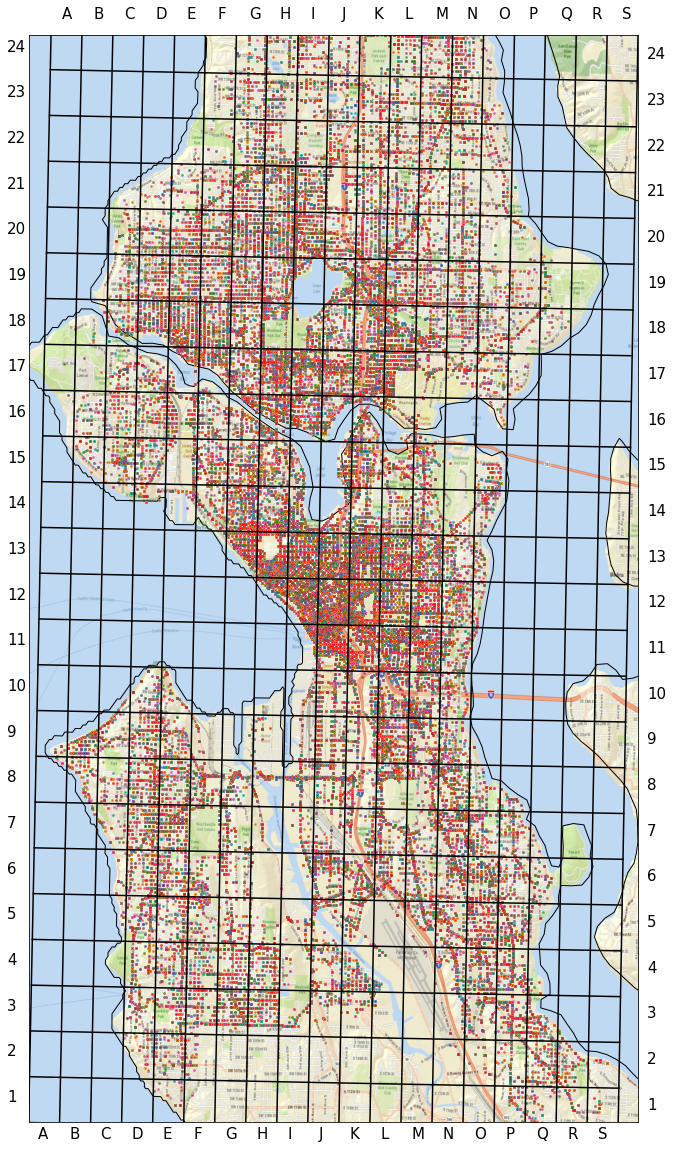

In [28]:
df_map = df

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [24,20]

llon=-122.425
ulon=-122.235
llat=47.495
ulat=47.735

my_map = Basemap(projection='merc',
            resolution = 'f', area_thresh = 1,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat, #max longitude (urcrnrlon) and latitude (urcrnrlat)
            epsg=2855)

my_map.drawcoastlines()
my_map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 6000, verbose= True)

xs,ys = my_map(np.asarray(df_map.X), np.asarray(df_map.Y))
df_map['xm']= xs.tolist()
df_map['ym'] =ys.tolist()

###Visualization1
for index,row in df_map.iterrows():
    #   x,y = my_map(row.Long, row.L22.240at)
    my_map.plot(row.xm, row.ym, markerfacecolor =([1,0,0]),  marker='o', markersize= 2, alpha = 0.65)
#plt.text(x,y,stn)
#plt.show()
for lat in np.arange(llat, ulat*0.99999,0.01):
    lon = np.linspace(llon, ulon)
    lat = np.linspace(lat, lat)
    x,y = my_map(lon,lat)
    my_map.plot(x,y, linewidth=1.5, color='black',linestyle='-')

for lon in np.arange(llon, ulon*0.99999,0.01):
    lon = np.linspace(lon, lon)
    lat = np.linspace(llat, ulat)
    x,y = my_map(lon,lat)
    my_map.plot(x,y, linewidth=1.5, color='black',linestyle='-')


for anx in np.arange(1, 20, 1):
    plt.annotate(chr(ord('@')+anx), xy=(0.016 + (0.935-0.016)*(anx-1)/18, -0.015), fontsize=15, xycoords='axes fraction')
for anx in np.arange(1, 20, 1):
    plt.annotate(chr(ord('@')+anx), xy=(0.055 + (0.935-0.016)*(anx-1)/18, 1.015), fontsize=15, xycoords='axes fraction')
for anny in np.arange(1, 25, 1):
    plt.annotate(str(anny), xy=(-0.035, 0.019 + (0.985-0.019)*(anny-1)/23), fontsize=15, xycoords='axes fraction')
for anny in np.arange(1, 25, 1):
    plt.annotate(str(anny), xy=(1.015, 0.012 + (0.985-0.019)*(anny-1)/23), fontsize=15, xycoords='axes fraction')
    
plt.show()

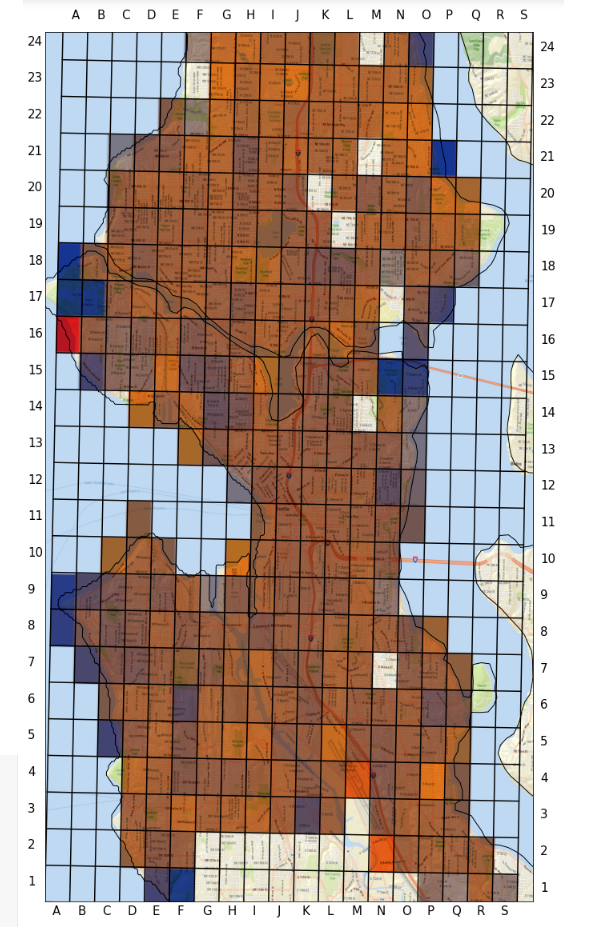

In [30]:
from PIL import Image
%matplotlib inline
rcParams['figure.figsize'] = [24,20]

my_map = Basemap(projection='merc',
            resolution = 'f', area_thresh = 1,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat, #max longitude (urcrnrlon) and latitude (urcrnrlat)
            epsg=2855)

my_map.drawcoastlines()
my_map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 6000, verbose= True)


for lat in np.arange(llat, ulat*0.99999,0.01):
    lon = np.linspace(llon, ulon)
    lat = np.linspace(lat, lat)
    x,y = my_map(lon,lat)
    my_map.plot(x,y, linewidth=1.5, color='black',linestyle='-')

for lon in np.arange(llon, ulon*0.99999,0.01):
    lon = np.linspace(lon, lon)
    lat = np.linspace(llat, ulat)
    x,y = my_map(lon,lat)
    my_map.plot(x,y, linewidth=1.5, color='black',linestyle='-')

for anx in np.arange(1, 20, 1):
    plt.annotate(chr(ord('@')+anx), xy=(0.016 + (0.935-0.016)*(anx-1)/18, -0.015), fontsize=15, xycoords='axes fraction')
for anx in np.arange(1, 20, 1):
    plt.annotate(chr(ord('@')+anx), xy=(0.055 + (0.935-0.016)*(anx-1)/18, 1.015), fontsize=15, xycoords='axes fraction')
for anny in np.arange(1, 25, 1):
    plt.annotate(str(anny), xy=(-0.035, 0.019 + (0.985-0.019)*(anny-1)/23), fontsize=15, xycoords='axes fraction')
for anny in np.arange(1, 25, 1):
    plt.annotate(str(anny), xy=(1.015, 0.012 + (0.985-0.019)*(anny-1)/23), fontsize=15, xycoords='axes fraction')
    
plt.show()

datafile = 'map.png'
im = plt.imread(datafile)
my_map.imshow(im, zorder=1, origin='upper', alpha=0.75)

4\. <font size="4"> **Distance from city center** </font>

Another approach is to group the accidents by distance from Seattle's city center, and calculate for this case as well, the average SEVERITYCODE (AVG(SEVERITYCODE)-1 **~** Severity Probability): 

In [26]:
import math
R = 6373.0 # radius of the Earth
lat1 = math.radians(47.6062)
lon1 = math.radians(-122.3321)
distance=[]
df2 = df
for i in np.arange(0,len(df),1):
    lat2 = math.radians(df2.Y[i])
    lon2 = math.radians(df2.X[i])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 #Haversine formula
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dist = R * c
    distance.append(dist)
    
df['DISTANCE']=distance

In [27]:
df['DISTANCE_bin'] = pd.cut(df.DISTANCE, np.arange(0, max(df.DISTANCE)+2.5, 2.5),
                            labels=[str(i)+"-"+str(i+2.5) for i in np.arange(0, max(df.DISTANCE), 2.5)])

In [28]:
df.groupby(['DISTANCE_bin']).mean().SEVERITYCODE

DISTANCE_bin
0.0-2.5      1.314202
2.5-5.0      1.319706
5.0-7.5      1.323834
7.5-10.0     1.340177
10.0-12.5    1.369089
12.5-15.0    1.392390
Name: SEVERITYCODE, dtype: float64

In [29]:
pd.crosstab(df.DISTANCE_bin, df.SEVERITYCODE, normalize="index")

SEVERITYCODE         1         2
DISTANCE_bin                    
0.0-2.5       0.685798  0.314202
2.5-5.0       0.680294  0.319706
5.0-7.5       0.676166  0.323834
7.5-10.0      0.659823  0.340177
10.0-12.5     0.630911  0.369089
12.5-15.0     0.607610  0.392390

So, let's see a first time what the correlation between the two new spatial features is. To do so, we trust once more the Crammer's V Correlation:

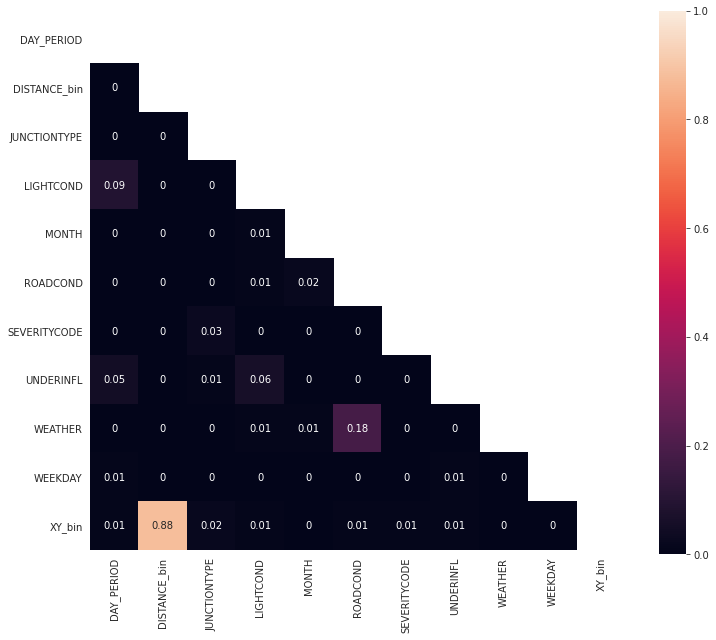

In [35]:
#Encoding categorical variables
label = preprocessing.LabelEncoder()
df_encoded = pd.DataFrame() 
for i in df[df.columns.difference(['X', 'Y', 'X_cut','X_bin', 'Y_cut', 'Y_bin', 'xm', 'ym', 'DISTANCE'])].columns:
    df_encoded[i]=label.fit_transform(df[df.columns.difference(['X','Y'])][i])
    
#Building of the matrix
rows= []
for var1 in df_encoded:
    col = []
    for var2 in df_encoded :
        cramers =cramers_V(df_encoded[var1], df_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results, columns = df_encoded.columns, index =df_encoded.columns)

#Plot heatmap half-matrix
plt.figure(figsize=(12,10))
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data, mask=mask, annot=True, vmin=0., vmax=1, square=True)
plt.show()

From the above figure, an indisputable correlation of these two features becomes apparent. So, arriving at the stage of model-building,  in the beginning, we will not use the two features at the same time. We will first try to train the models by including only one of the XY_bin and DISTANCE_bin. And since our primary goal is both to make predictions as well as to better understand the role of each independent variable, then we will try both at the same time, keeping in mind that collinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. 

In [30]:
df = df[df.columns.difference(['X', 'Y', 'X_cut','X_bin', 'Y_cut', 'Y_bin', 'xm', 'ym', 'DISTANCE'])]

## 4.3. Data Preprocessing  <a name="preprocessing"></a>
### Dataset Balancing

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important. 

One approach to addressing imbalanced datasets is to oversample the minority class and we can find here simpler and more elaborated techniques (SMOT). In our case we will proceed by simply downsampling the majority class (SEVERITYCODE=1):

In [31]:
df_2 =df[df.SEVERITYCODE==2]
df_1 = df[df.SEVERITYCODE==1].sample(len(df_2), random_state=5959)
data = df_1.append(df_2)
data = data.sort_index().reset_index(drop=True)

### Train-Test Data Split

Before starting the model building, let's select randomly a 5% fraction of our *data* dataset and hold it out, so as to use it eventually as the test dataset for our different ML algorithms. 

In [32]:
from sklearn.model_selection import train_test_split

data, test_data = train_test_split(data, test_size=0.05, random_state=5959)
print('data\'s dimensions:',data.shape)
print('test_data\'s dimensions:',test_data.shape)

data's dimensions: (103631, 11)
test_data's dimensions: (5455, 11)


### Encoding
We  continue by encoding the variables that need it, choosing One-Hot-Encoding for some of them

In [33]:
JUNCTIONTYPE =  pd.get_dummies(data['JUNCTIONTYPE'])
LIGHTCOND =  pd.get_dummies(data['LIGHTCOND'])
ROADCOND =  pd.get_dummies(data['ROADCOND'])
WEATHER =  pd.get_dummies(data['WEATHER'])

label = preprocessing.LabelEncoder()
data['DAY_PERIOD'] = label.fit_transform(data['DAY_PERIOD'])
data['DISTANCE_bin'] = label.fit_transform(data['DISTANCE_bin'])
data['XY_bin'] =  label.fit_transform(data['XY_bin'])
data['UNDERINFL'] =  label.fit_transform(data['UNDERINFL'])
data['SEVERITYCODE'] =  label.fit_transform(data['SEVERITYCODE'])
data = pd.concat([data[['SEVERITYCODE', 'DISTANCE_bin', 'XY_bin', 'DAY_PERIOD', 'WEEKDAY', 'MONTH', 'UNDERINFL']],
                  JUNCTIONTYPE,
                  LIGHTCOND,
                  ROADCOND,
                  WEATHER], axis=1).reset_index(drop=True)

We will just drop all the features who count less than 1/1000 occurences in our dataset.

In [34]:
t = data.describe()
data = data.drop(list(t.loc['mean'].sort_values()[t.loc['mean']<0.001].index), axis=1)

data.iloc[:,1:].shape

(103631, 26)

So, we end up with **26 features**

### Normalization
Finally we normalize our features, taking at the same time care of creating 4 different features sets, that is, all possible combinations with or without *XY_bin* and *DISTANCE_bin*.

In [35]:
X = data.iloc[:,1:]
y = data.SEVERITYCODE

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 
Xboth = X
Xxy = pd.DataFrame(X).iloc[:,1:].to_numpy()
Xdist = pd.DataFrame(X).loc[:,pd.DataFrame(X).columns != 1].to_numpy()
Xnone = pd.DataFrame(X).iloc[:,2:].to_numpy()

## 4.4. Classification Model Building  <a name="building"></a>
Now, it is time to build our accurate model and then use a test set to report the accuracy. We should use the following algorithm:
- **K Nearest Neighbor(KNN)**
- **Decision Tree**
- **Support Vector Machine**
- **Logistic Regression**

in all the four different options:
- with only XY_bin feature,
- with only DISTANCE_bin feature,
- with both XY_bin and DISTANCE_bin features
- with neither XY_bin or DISTANCE_bin features

### K Nearest Neighbor (KNN) <a name="knn"></a>

Instead of a train-test split with a simple out-of-sample validation of the result, we will rather use a 10-fold cross-validation:

In [44]:
# so, after importing the knn classifier library
from sklearn.neighbors import KNeighborsClassifier

# we have also to import the cross-validation library
from sklearn.model_selection import cross_val_score

Instead of using the Grid (or Random) search embeded in scikit-learn library in order to optimize the hyperparameter k,
we will rather use iteration to caclulate different models with different values of k nearest neighbors for the different feature sets (with and without the two spatial features); then we will calculate and plot the corresponding average accuracies based on the cross validation

For proceeding to so many different and computationally expensive enough tests, we will use only a sample fraction (10%) of the whole dataset.

So let's start the accuracy of k values from 1 to 100 with the <font size="4">**Xboth**</font> feature set:

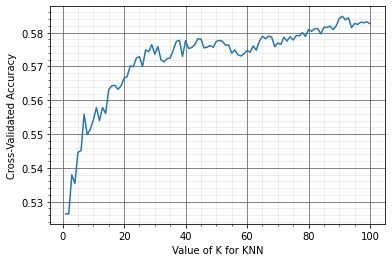

In [43]:
X_sample_df = pd.DataFrame(Xboth).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

from sklearn.model_selection import KFold
# we will try k values up to 100
k_range = range(1, 101)
# empty list that will hold accuracy scores for different k's
k_scores = []
kf = KFold(n_splits=10, random_state=5959)

## perform 10-fold cross-validation knn classification and store the accuracy scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sample, y_sample, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
    
# we plot the accuracies for the different k's
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

According to our results, for Xboth feature set it's better to use a k value equal to 32 (elbow). Thus we choose the *k* to be 30 and we train again our model, this with all our data.

In [47]:
knn_both = KNeighborsClassifier(n_neighbors = 32)
knn_both.fit(X_both,y_both)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='uniform')

We go on with the <font size="4"> **Xxy**</font> feature set:

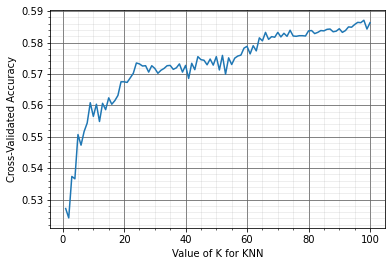

In [46]:
X_sample_df = pd.DataFrame(Xxy).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

from sklearn.model_selection import KFold
k_range = range(1, 101)
k_scores_xy = []
kf = KFold(n_splits=10, random_state=5959)

## perform 10-fold cross-validation knn classification and store the accuracy scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sample, y_sample, cv=kf, scoring='accuracy')
    k_scores_xy.append(scores.mean())
    
# we plot the accuracies for the different k's
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range, k_scores_xy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

According to our results, for Xxy feature set it's better to use a k value equal to 24 (elbow). Thus we choose the *k* to be 30 and we train again our model with all our data.

In [49]:
knn_xy = KNeighborsClassifier(n_neighbors = 24)
knn_xy.fit(Xxy,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

We go on with the <font size="4"> **Xdist**</font> feature set:

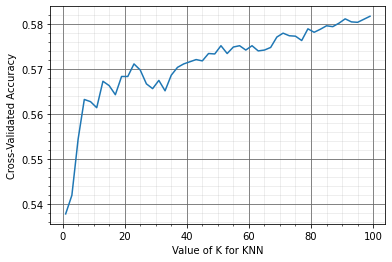

In [49]:
X_sample_df = pd.DataFrame(Xdist).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

from sklearn.model_selection import KFold
k_range = range(1, 101)
k_scores = []
kf = KFold(n_splits=10, random_state=5959)

## perform 10-fold cross-validation knn classification and store the accuracy scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sample, y_sample, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())

# we plot the accuracies for the different k's
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

According to our results, for Xdist feature set it's better to use a k value equal to 23 (elbow). Thus we choose the *k* to be 23 and we train again our model, this time with all our data.

In [51]:
knn_dist = KNeighborsClassifier(n_neighbors = 23)
knn_dist.fit(Xdist,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

And we conclude the knn classifier optimization part with the <font size="4"> **Xnone**</font> feature set:

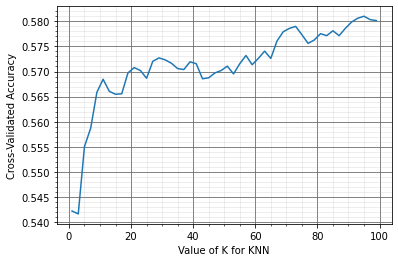

In [53]:
X_sample_df = pd.DataFrame(Xnone).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

from sklearn.model_selection import KFold
k_range = range(1, 101)
k_scores = []
kf = KFold(n_splits=10, random_state=5959)

## perform 10-fold cross-validation knn classification and store the accuracy scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_sample, y_sample, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
    
# we plot the accuracies for the different k's
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

According to our results, for Xnone feature set it's better to use a k value equal to 30. Thus we choose the *k* to be 30 and we train again our model with all our data.

In [52]:
knn_none = KNeighborsClassifier(n_neighbors = 30)
knn_none.fit(Xnone,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

### Decision Tree <a name="tree"></a>

Here again, we wiil stick to previous approach: ***we will use iteration to calculate different models with different values of max_depth for our decision trees***

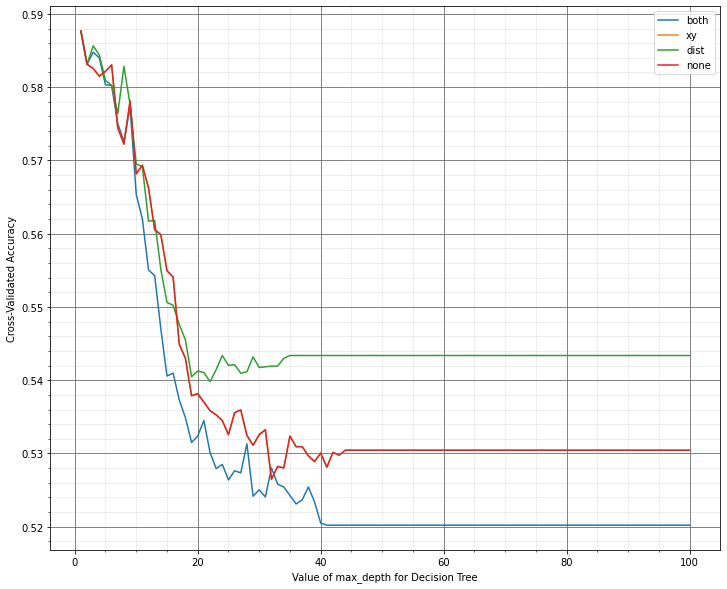

In [55]:
X_sample_df = pd.DataFrame(Xboth).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

from sklearn.tree import DecisionTreeClassifier

# actually we will try maximimum depth values up to 40
max_depth_range = range(1, 101, 1)

# empty list that will hold accuracy scores for different maximum depths
max_depth_scores_both = []

# perform 10-fold cross-validation decision trees and store the accuracy scores
for md in max_depth_range:
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = md, random_state=0)
    scores = cross_val_score(drugTree, X_sample, y_sample, cv=kf, scoring='accuracy')
    max_depth_scores_both.append(scores.mean())
    
X_sample_df = pd.DataFrame(Xxy).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

max_depth_scores_xy = []

# perform 10-fold cross-validation decision trees and store the accuracy scores
for md in max_depth_range:
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = md, random_state=0)
    scores = cross_val_score(drugTree, X_sample, y_sample, cv=kf, scoring='accuracy')
    max_depth_scores_xy.append(scores.mean())
    
X_sample_df = pd.DataFrame(Xdist).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

max_depth_scores_dist = []

# perform 10-fold cross-validation decision trees and store the accuracy scores
for md in max_depth_range:
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = md, random_state=0)
    scores = cross_val_score(drugTree, X_sample, y_sample, cv=kf, scoring='accuracy')
    max_depth_scores_dist.append(scores.mean())

X_sample_df = pd.DataFrame(Xxy).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

max_depth_scores_none = []

# perform 10-fold cross-validation decision trees and store the accuracy scores
for md in max_depth_range:
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = md, random_state=0)
    scores = cross_val_score(drugTree, X_sample, y_sample, cv=kf, scoring='accuracy')
    max_depth_scores_none.append(scores.mean())
    

%matplotlib inline
rcParams['figure.figsize'] = [12,10]

plt.plot(max_depth_range, max_depth_scores_both, label="both")
plt.plot(max_depth_range, max_depth_scores_xy, label="xy")
plt.plot(max_depth_range, max_depth_scores_dist, label="dist")
plt.plot(max_depth_range, max_depth_scores_none, label="none")

plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.legend()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()



 From the above results, it becomes clear that we shouldn't use a Decision Tree algorithm Classifier. We trained all datasets with increasing depth and charted out the performances. As apparent from the figure,  as the depth the of tree increases, the model accuracy (the metric of evaluation) clearly decreases. This observation concerns of course only the validation  and cross-validation datasets. If we had tried to measure the accuracy on the training set itself, it is absolutely certain and logical we would observe a severe gap. The tendance in that case would be the opposite as accuracy for the training dataset increases as the complexity (in our case: max depth) increases.  As we can see as the complexity of decision tree increases with increase in tree depth, in turn, overfitting also increases. **The fact that Accuracy for the validation set (or CV accuracy) drops significantly as tree depth increases, suggests overfitting but that is in any case an insctance of one of the critical shortcomings of decision trees that any data scientist should be aware about: Decision Trees very easily ovefit.**

### Support Vector Machine (SVM) <a name="svm"></a>

We will also try the prediction efficiency of the Support Vector Machine algorithm with different kernel functions — radial basis, linear, polynomial and sigmoid:

In [38]:
from sklearn import svm
clf1 = svm.SVC(kernel='rbf', random_state=0, gamma='auto')
clf2 = svm.SVC(kernel='linear', random_state=0, gamma='auto')
clf3 = svm.SVC(kernel='poly', random_state=0, gamma='auto')
clf4 = svm.SVC(kernel='sigmoid', random_state=0, gamma='auto')

X_sample_df = pd.DataFrame(Xboth).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1_both = cross_val_score(clf1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2_both = cross_val_score(clf2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3_both = cross_val_score(clf3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4_both = cross_val_score(clf4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()

print("accuracy_rbf_both:", score1_both, "\naccuracy_linear_both:", score2_both,
      "\naccuracy_poly_both:", score3_both, "\naccuracy_sigmoid_both:", score4_both)

X_sample_df = pd.DataFrame(Xxy).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1_xy = cross_val_score(clf1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2_xy = cross_val_score(clf2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3_xy = cross_val_score(clf3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4_xy = cross_val_score(clf4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()

print("accuracy_rbf_xy:", score1_xy, "\naccuracy_linear_xy:", score2_xy,
      "\naccuracy_poly_xy:", score3_xy, "\naccuracy_sigmoid_xy:", score4_xy)

X_sample_df = pd.DataFrame(Xdist).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1_dist = cross_val_score(clf1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2_dist = cross_val_score(clf2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3_dist = cross_val_score(clf3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4_dist = cross_val_score(clf4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()

print("accuracy_rbf_dist:", score1_dist, "\naccuracy_linear_dist:", score2_dist,
      "\naccuracy_poly_dist:", score3_dist, "\naccuracy_sigmoid_dist:", score4_dist)

X_sample_df = pd.DataFrame(Xnone).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1_none = cross_val_score(clf1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2_none = cross_val_score(clf2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3_none = cross_val_score(clf3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4_none = cross_val_score(clf4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()

print("accuracy_rbf_none:", score1_none, "\naccuracy_linear_none:", score2_none,
      "\naccuracy_poly_none:", score3_none, "\naccuracy_sigmoid_none:", score4_none)

accuracy_rbf_both: 0.5903684335940845 
accuracy_linear_both: 0.5905596221652152 
accuracy_poly_both: 0.5867006660883227 
accuracy_sigmoid_both: 0.5380693305235253
accuracy_rbf_xy: 0.5900789513856053 
accuracy_linear_xy: 0.5905596221652152 
accuracy_poly_xy: 0.5870865803122312 
accuracy_sigmoid_xy: 0.5250415141688044
accuracy_rbf_dist: 0.5874735184281954 
accuracy_linear_dist: 0.5905596221652152 
accuracy_poly_dist: 0.5846747560344474 
accuracy_sigmoid_dist: 0.5336294553266587
accuracy_rbf_none: 0.5898867389224188 
accuracy_linear_none: 0.5905596221652152 
accuracy_poly_none: 0.5821657550924668 
accuracy_sigmoid_none: 0.5345931239132782


From the above, it becomes evident it's the linear kernel function that we should use for our Support Vector Machine algortihm Classifier. Thus, accordingly we train again our models with all our data.

In [54]:
clf_both = svm.SVC(kernel='linear', random_state=0, gamma='auto')
clf_xy = svm.SVC(kernel='linear', random_state=0, gamma='auto')
clf_dist = svm.SVC(kernel='linear', random_state=0, gamma='auto')
clf_none = svm.SVC(kernel='linear', random_state=0, gamma='auto')
clf_both.fit(Xboth, y)
clf_xy.fit(Xxy, y)
clf_dist.fit(Xdist, y)
clf_none.fit(Xnone, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Logistic Regression <a name="logreg"></a>

Finally, we will try a Logistic Regression approach and we will start by testing the differnet solvers for C=0.01

In [56]:
X_sample_df = pd.DataFrame(Xboth).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR1 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
LR2 = LogisticRegression(C=0.01, solver='newton-cg', random_state=0)
LR3 = LogisticRegression(C=0.01, solver='lbfgs', random_state=0)
LR4 = LogisticRegression(C=0.01, solver='sag', random_state=0)
LR5 = LogisticRegression(C=0.01, solver='saga', random_state=0)
X_sample_df = pd.DataFrame(Xboth).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1 = cross_val_score(LR1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2 = cross_val_score(LR2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3 = cross_val_score(LR3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4 = cross_val_score(LR4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score5 = cross_val_score(LR5, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
print("Accuracy Xboth liblinear:", score1, "\nAccuracy Xboth newton-cg:", score2,
      "\nAccuracy Xboth lbfgs:", score3, "\nAccuracy Xboth sag:", score4, "\nAccuracy Xboth saga:", score5)
X_sample_df = pd.DataFrame(Xxy).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1 = cross_val_score(LR1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2 = cross_val_score(LR2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3 = cross_val_score(LR3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4 = cross_val_score(LR4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score5 = cross_val_score(LR5, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
print("Accuracy Xxy liblinear:", score1, "\nAccuracy Xxy newton-cg:", score2,
      "\nAccuracy Xxy lbfgs:", score3, "\nAccuracy Xxy sag:", score4, "\nAccuracy Xxy saga:", score5)
X_sample_df = pd.DataFrame(Xdist).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1 = cross_val_score(LR1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2 = cross_val_score(LR2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3 = cross_val_score(LR3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4 = cross_val_score(LR4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score5 = cross_val_score(LR5, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
print("Accuracy Xdist liblinear:", score1, "\nAccuracy Xdist newton-cg:", score2,
      "\nAccuracy Xdist lbfgs:", score3, "\nAccuracy Xdist sag:", score4, "\nAccuracy Xboth saga:", score5)
X_sample_df = pd.DataFrame(Xnone).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
score1 = cross_val_score(LR1, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score2 = cross_val_score(LR2, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score3 = cross_val_score(LR3, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score4 = cross_val_score(LR4, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
score5 = cross_val_score(LR5, X_sample, y_sample, cv=kf, scoring='accuracy').mean()
print("Accuracy Xnone liblinear:", score1, "\nAccuracy Xnone newton-cg:", score2,
      "\nAccuracy Xnone lbfgs:", score3, "\nAccuracy Xnone sag:", score4, "\nAccuracy Xnone saga:", score5)

Accuracy Xboth liblinear: 0.5889210225516879 
Accuracy Xboth newton-cg: 0.5886314472621127 
Accuracy Xboth lbfgs: 0.5887279723586378 
Accuracy Xboth sag: 0.5886314472621127 
Accuracy Xboth saga: 0.5886314472621127
Accuracy Xxy liblinear: 0.5888244043740668 
Accuracy Xxy newton-cg: 0.5893068436945004 
Accuracy Xxy lbfgs: 0.5892103185979752 
Accuracy Xxy sag: 0.5893068436945004 
Accuracy Xxy saga: 0.5893068436945004
Accuracy Xdist liblinear: 0.5895962328218838 
Accuracy Xdist newton-cg: 0.5896928509995049 
Accuracy Xdist lbfgs: 0.5896928509995049 
Accuracy Xdist sag: 0.5896928509995049 
Accuracy Xboth saga: 0.5896928509995049
Accuracy Xnone liblinear: 0.5904644002040338 
Accuracy Xnone newton-cg: 0.5907537893314171 
Accuracy Xnone lbfgs: 0.5907537893314171 
Accuracy Xnone sag: 0.5907537893314171 
Accuracy Xnone saga: 0.5907537893314171


Even the differences are very small, or exactly due to this, we can safely conclude that we should pich and try to optimize the performance of liblinear solver for all our datasets.

In the meantime, by restraining more and more the C values field, we end up investigating the best value for parameter C in the space \[\0.0005, 0.005\].

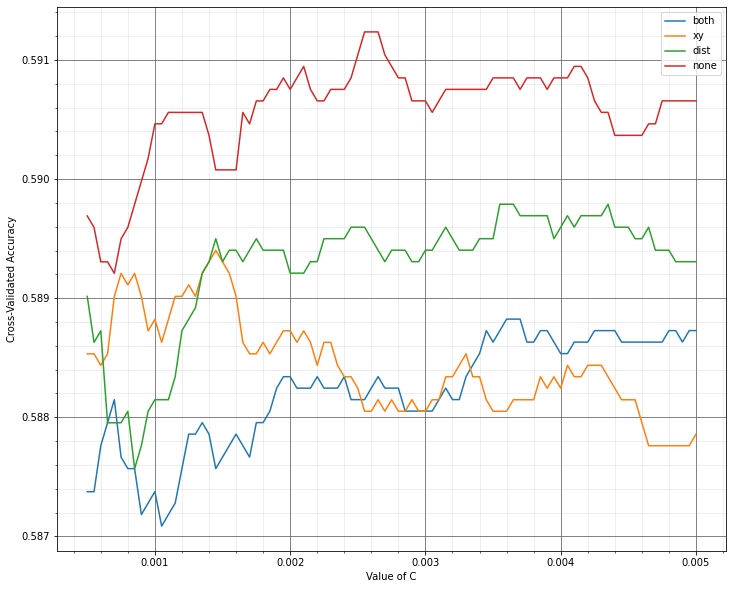

In [62]:
C_range = np.linspace(0.0005, .005, 91)

# empty list that will hold accuracy scores for different maximum depths
C_scores_both = []
C_scores_xy = []
C_scores_dist = []
C_scores_none = []

# perform 10-fold cross-validation decision trees and store the accuracy scores
X_sample_df = pd.DataFrame(Xboth).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
for c in C_range:
    LR = LogisticRegression(solver='liblinear', random_state=0, C=c)
    scores = cross_val_score(LR, X_sample, y_sample, cv=10, scoring='accuracy')
    C_scores_both.append(scores.mean())
X_sample_df = pd.DataFrame(Xxy).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
for c in C_range:
    LR = LogisticRegression(solver='liblinear', random_state=0, C=c)
    scores = cross_val_score(LR, X_sample, y_sample, cv=10, scoring='accuracy')
    C_scores_xy.append(scores.mean())
X_sample_df = pd.DataFrame(Xdist).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
for c in C_range:
    LR = LogisticRegression(solver='liblinear', random_state=0, C=c)
    scores = cross_val_score(LR, X_sample, y_sample, cv=10, scoring='accuracy')
    C_scores_dist.append(scores.mean())
X_sample_df = pd.DataFrame(Xnone).sample(frac=0.1, random_state=5959).sort_index()
y_sample = y[X_sample_df.index]
X_sample = X_sample_df.to_numpy()
for c in C_range:
    LR = LogisticRegression(solver='liblinear', random_state=0, C=c)
    scores = cross_val_score(LR, X_sample, y_sample, cv=10, scoring='accuracy')
    C_scores_none.append(scores.mean())

%matplotlib inline
rcParams['figure.figsize'] = [12,10]
plt.plot(C_range, C_scores_both, label="both")
plt.plot(C_range, C_scores_xy, label="xy")
plt.plot(C_range, C_scores_dist, label="dist")
plt.plot(C_range, C_scores_none, label="none")

plt.xlabel('Value of C')
plt.ylabel('Cross-Validated Accuracy')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend()

plt.show()

So, it comes up that the ideal C values for all four feature sets are:

In [63]:
print("both:",C_range[min(np.where(C_scores_both==max(C_scores_both))[0])])
print("xy:",C_range[min(np.where(C_scores_xy==max(C_scores_xy))[0])])
print("dist:",C_range[min(np.where(C_scores_dist==max(C_scores_dist))[0])])
print("none:",C_range[min(np.where(C_scores_none==max(C_scores_none))[0])])

both: 0.0036000000000000008
xy: 0.0014500000000000003
dist: 0.0035500000000000006
none: 0.00255


And accordingly we train again our models, this time with all the data:

In [65]:
LR_both = LogisticRegression(solver='liblinear', random_state=0,
                             C=C_range[min(np.where(C_scores_both==C_scores_both.max())[0])])
LR_xy = LogisticRegression(solver='liblinear', random_state=0,
                           C=C_range[min(np.where(C_scores_xy==C_scores_xy.max())[0])])
LR_dist = LogisticRegression(solver='liblinear', random_state=0,
                             C=C_range[min(np.where(C_scores_dist==C_scores_dist.max())[0])])
LR_none = LogisticRegression(solver='liblinear', random_state=0,
                             C=C_range[min(np.where(C_scores_none==C_scores_none.max())[0])])
LR_both.fit(Xboth, y)
LR_xy.fit(Xxy, y)
LR_dist.fit(Xdist, y)
LR_none.fit(Xnone, y)

LogisticRegression(C=0.00255, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

---

## Results and Discussion: Model Evaluation & Selection <a name="results"></a>

## Model Evaluation using Test set

In order to evaluate the selected models, we will use the hold-out test dataset, which we have to preprocess the way (using the same parameters) we did with the training-validation dataset. 

In [104]:
JUNCTIONTYPE =  pd.get_dummies(test_data['JUNCTIONTYPE'])
LIGHTCOND =  pd.get_dummies(test_data['LIGHTCOND'])
ROADCOND =  pd.get_dummies(test_data['ROADCOND'])
WEATHER =  pd.get_dummies(test_data['WEATHER'])

label = preprocessing.LabelEncoder()
test_data['DAY_PERIOD'] = label.fit_transform(test_data['DAY_PERIOD'])
test_data['DISTANCE_bin'] = label.fit_transform(test_data['DISTANCE_bin'])
test_data['XY_bin'] =  label.fit_transform(test_data['XY_bin'])
test_data['UNDERINFL'] =  label.fit_transform(test_data['UNDERINFL'])
test_data['SEVERITYCODE'] =  label.fit_transform(test_data['SEVERITYCODE'])
test_data = pd.concat([test_data[['SEVERITYCODE', 'DISTANCE_bin', 'XY_bin',
                                  'DAY_PERIOD', 'WEEKDAY', 'MONTH', 'UNDERINFL']],
                       JUNCTIONTYPE,
                       LIGHTCOND,
                       ROADCOND,
                       WEATHER], axis=1).reset_index(drop=True)
t = test_data.describe()
test_data = test_data.drop(list(t.loc['mean'].sort_values()[t.loc['mean']<0.001].index), axis=1)

test_X = test_data.iloc[:,1:]
test_y = test_data.SEVERITYCODE
test_X = scaler.transform(test_X)

test_Xboth = test_X
test_Xxy = pd.DataFrame(test_X).iloc[:,1:].to_numpy()
test_Xdist = pd.DataFrame(test_X).loc[:,pd.DataFrame(test_X).columns != 1].to_numpy()
test_Xnone = pd.DataFrame(test_X).iloc[:,2:].to_numpy()

We will just drop all the features who count less than 1/1000 occurences in our dataset.

In [105]:
yhat_knn_both = knn_both.predict(test_Xboth)
yhat_knn_xy = knn_xy.predict(test_Xxy)
yhat_knn_dist = knn_dist.predict(test_Xdist)
yhat_knn_none = knn_none.predict(test_Xnone)
yhat_clf_both = clf_both.predict(test_Xboth)
yhat_clf_xy = clf_xy.predict(test_Xxy)
yhat_clf_dist = clf_dist.predict(test_Xdist)
yhat_clf_none = clf_none.predict(test_Xnone)
yhat_LR_both = LR_both.predict(test_Xboth)
yhat_LR_xy = LR_xy.predict(test_Xxy)
yhat_LR_dist = LR_dist.predict(test_Xdist)
yhat_LR_none = LR_none.predict(test_Xnone)

from sklearn.metrics import accuracy_score
accuracy = [round(accuracy_score(test_y, yhat_knn_both),2),
            round(accuracy_score(test_y, yhat_knn_xy),2),
            round(accuracy_score(test_y, yhat_knn_dist),2),
            round(accuracy_score(test_y, yhat_knn_none),2),
            round(accuracy_score(test_y, yhat_clf_both),2),
            round(accuracy_score(test_y, yhat_clf_xy),2),
            round(accuracy_score(test_y, yhat_clf_dist),2),
            round(accuracy_score(test_y, yhat_clf_none),2),
            round(accuracy_score(test_y, yhat_LR_both),2),
            round(accuracy_score(test_y, yhat_LR_xy),2),
            round(accuracy_score(test_y, yhat_LR_dist),2),
            round(accuracy_score(test_y, yhat_LR_none),2)]

from sklearn.metrics import jaccard_similarity_score
jaccard = [round(jaccard_similarity_score(test_y, yhat_knn_both),2),
            round(jaccard_similarity_score(test_y, yhat_knn_xy),2),
            round(jaccard_similarity_score(test_y, yhat_knn_dist),2),
            round(jaccard_similarity_score(test_y, yhat_knn_none),2),
            round(jaccard_similarity_score(test_y, yhat_clf_both),2),
            round(jaccard_similarity_score(test_y, yhat_clf_xy),2),
            round(jaccard_similarity_score(test_y, yhat_clf_dist),2),
            round(jaccard_similarity_score(test_y, yhat_clf_none),2),
            round(jaccard_similarity_score(test_y, yhat_LR_both),2),
            round(jaccard_similarity_score(test_y, yhat_LR_xy),2),
            round(jaccard_similarity_score(test_y, yhat_LR_dist),2),
            round(jaccard_similarity_score(test_y, yhat_LR_none),2)]

from sklearn.metrics import f1_score
f1 = [round(f1_score(test_y, yhat_knn_both, average='weighted', labels=np.unique(yhat_knn_both)),2),
      round(f1_score(test_y, yhat_knn_xy, average='weighted', labels=np.unique(yhat_knn_xy)),2),
      round(f1_score(test_y, yhat_knn_dist, average='weighted', labels=np.unique(yhat_knn_dist)),2),
      round(f1_score(test_y, yhat_knn_none, average='weighted', labels=np.unique(yhat_knn_none)),2),
      round(f1_score(test_y, yhat_clf_both, average='weighted', labels=np.unique(yhat_clf_both)),2),
      round(f1_score(test_y, yhat_clf_xy, average='weighted', labels=np.unique(yhat_clf_xy)),2),
      round(f1_score(test_y, yhat_clf_dist, average='weighted', labels=np.unique(yhat_clf_dist)),2),
      round(f1_score(test_y, yhat_clf_none, average='weighted', labels=np.unique(yhat_clf_none)),2),
      round(f1_score(test_y, yhat_LR_both, average='weighted', labels=np.unique(yhat_LR_both)),2),
      round(f1_score(test_y, yhat_LR_xy, average='weighted', labels=np.unique(yhat_LR_xy)),2),
      round(f1_score(test_y, yhat_LR_dist, average='weighted', labels=np.unique(yhat_LR_dist)),2),
      round(f1_score(test_y, yhat_LR_none, average='weighted', labels=np.unique(yhat_LR_none)),2)]

from sklearn.metrics import log_loss
yhat_LR_proba_both = LR_both.predict_proba(test_Xboth)
yhat_LR_proba_xy = LR_xy.predict_proba(test_Xxy)
yhat_LR_proba_dist = LR_dist.predict_proba(test_Xdist)
yhat_LR_proba_none = LR_none.predict_proba(test_Xnone)
LogLoss = ['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA',
           round(log_loss(test_y, yhat_LR_proba_both),2),
           round(log_loss(test_y, yhat_LR_proba_xy),2),
           round(log_loss(test_y, yhat_LR_proba_dist),2),
           round(log_loss(test_y, yhat_LR_proba_none),2)]

/home/tsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/home/tsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/home/tsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surpr

### And indeed:

In [141]:
table={'Algorithm':['KNN', 'KNN', 'KNN', 'KNN', 'SVM', 'SVM', 'SVM', 'SVM',
                    'Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression'],
       'Feature Set':['both', 'xy', 'dist', 'none', 'both', 'xy', 'dist', 'none', 'both', 'xy', 'dist', 'none'],
       'Accuracy': accuracy,
       'Jaccard':jaccard,
       'F1-score':f1,
       'LogLoss': LogLoss}
table = pd.DataFrame(table) 
table = table.style.hide_index()
table

From the above, we can say that we would prefer the Logistic Regression Algorithm, preferably with the dataset that doesn't include at all spatial features. In any case we can see that the predicition algorithms' performance cannot be considered as good. This low performance is getting even more observable if we take into account that for an absolutely balanced binary classification the performance of the worst algorithm, that is blind guessing, has an accuracy of 50%. Our future work should be concentrated on improving variables' exploratory analysis for a better feature extraction and selection. Mainly, though, we whould insist more on the feature engineering exploiting the location data. Clustering (DBSCAN and K-means) has its limitations but there is a lot of  interesting and potential work to be done towards this direction, so as to manage to create "practical" clusters based on locaton and car accident severity historical data.

## 6. Conclusion

In this study, our goal was to predict accurately the severity type of an accident depending on the given features.The results can have a better performance, a lot of improvement can be done on class 1 and 2 predictions. These models can be very useful in helping weather stations or news program alert drivers of the probabilities of car crashes and its type of severity (damage, injuries, fatality,…).

## Appendix <a name="appendix"></a>

### K-MEANS Clustering: Visualization of Clusters

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=378086.75228255824,51312.70578212582,397529.4569857417,84296.24568563106&bboxSR=2855&imageSR=2855&size=6000,10178&dpi=96&format=png32&transparent=true&f=image


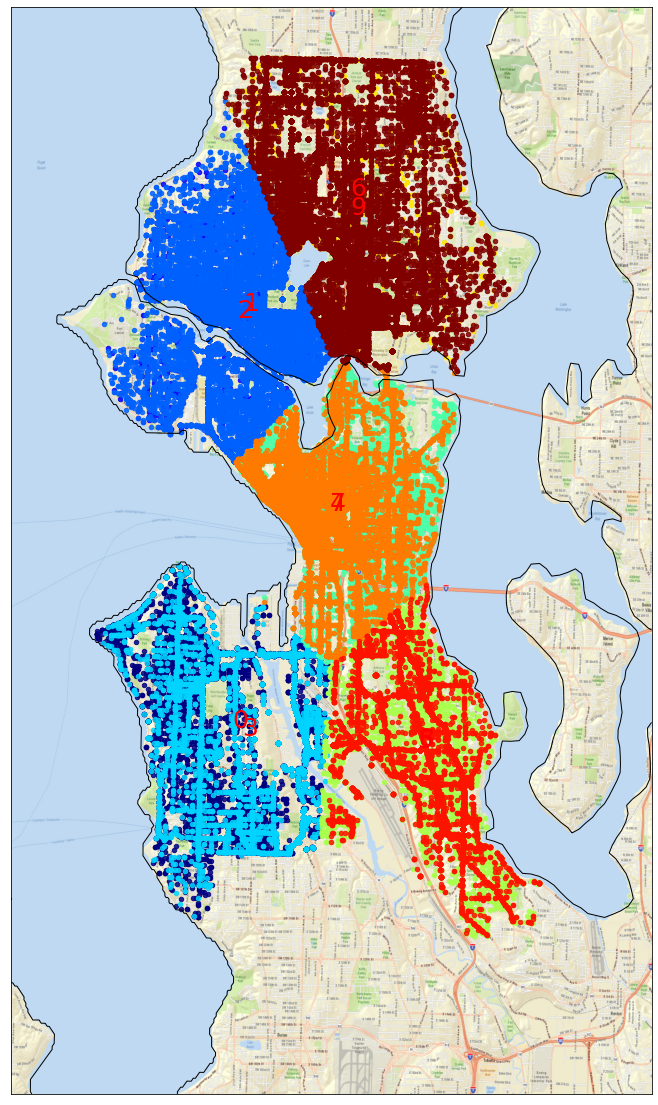

In [275]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [24,20]

llon=-122.45
ulon=-122.20
llat=47.45
ulat=47.75

#pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'f', area_thresh = 1,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat, #max longitude (urcrnrlon) and latitude (urcrnrlat)
            epsg=2855)

xs,ys = my_map(np.asarray(df.X), np.asarray(df.Y))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white')
#my_map.shadedrelief()
my_map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 6000, verbose= True)


# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.Clus_km == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=df.groupby('Clus_km').mean().xm[clust_number]
        ceny=df.groupby('Clus_km').mean().ym[clust_number]
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        #print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.SEVERITYCODE)))

### DBSCAN: Visualization of clusters based on location and SEVERITYCODE

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=378086.75228255824,51312.70578212582,397529.4569857417,84296.24568563106&bboxSR=2855&imageSR=2855&size=6000,10178&dpi=96&format=png32&transparent=true&f=image
Cluster 0, Avg Temp: 1.0
Cluster 1, Avg Temp: 1.0
Cluster 2, Avg Temp: 1.0
Cluster 3, Avg Temp: 1.0
Cluster 4, Avg Temp: 1.0
Cluster 5, Avg Temp: 1.0
Cluster 6, Avg Temp: 1.0
Cluster 7, Avg Temp: 1.0
Cluster 8, Avg Temp: 1.0
Cluster 9, Avg Temp: 1.0
Cluster 10, Avg Temp: 1.0
Cluster 11, Avg Temp: 1.0
Cluster 12, Avg Temp: 1.0
Cluster 13, Avg Temp: 1.0
Cluster 14, Avg Temp: 1.0
Cluster 15, Avg Temp: 1.0
Cluster 16, Avg Temp: 1.0
Cluster 17, Avg Temp: 1.0
Cluster 18, Avg Temp: 2.0
Cluster 19, Avg Temp: 1.0
Cluster 20, Avg Temp: 1.0
Cluster 21, Avg Temp: 2.0
Cluster 22, Avg Temp: 2.0
Cluster 23, Avg Temp: 1.0
Cluster 24, Avg Temp: 1.0
Cluster 25, Avg Temp: 2.0
Cluster 26, Avg Temp: 1.0
Cluster 27, Avg Temp: 1.0
Cluster 28, Avg Temp: 1.0

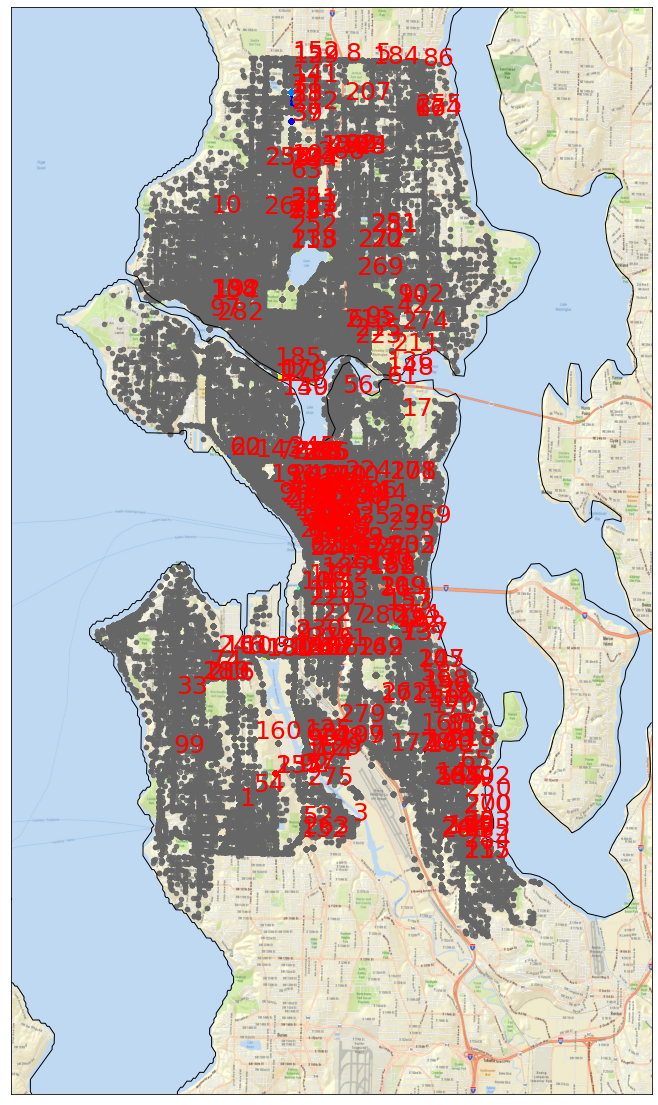

In [138]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [24,20]

llon=-122.45
ulon=-122.20
llat=47.45
ulat=47.75

#pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'f', area_thresh = 1,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat, #max longitude (urcrnrlon) and latitude (urcrnrlat)
            epsg=2855)

my_map.drawcoastlines()
##my_map.drawcountries()
##my_map.drawmapboundary()
##my_map.fillcontinents(color = 'white')
##my_map.shadedrelief()
my_map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 6000, verbose= True)

df_map = df
xs,ys = my_map(np.asarray(df_map.X), np.asarray(df_map.Y))
df_map['xm']= xs.tolist()
df_map['ym'] =ys.tolist()

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_map[['xm','ym','SEVERITYCODE']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.01, min_samples=50).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_map["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_map[df_map.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.SEVERITYCODE)))